## **INTRODUCTION**
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.



# **BUSINESS OBJECTIVE**
The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. As the data science lead i will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

**IMPORTING LIBRARIES**


So i will start with importing important libraries.
And also loading the data and move on to data cleaning and data analysis.
So let's go...

In [ ]:
#importing important libraries for the first part of the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Understanding**:
Will now load our datasets and take a tour on our data and try to understand it

In [ ]:
#We now load our data 
#and check the record entries
# url = 'http://bit.ly/FinancialDataset'
df = pd.read_csv('http://bit.ly/FinancialDataset')
df.shape

(23524, 13)

In [ ]:
#We view our first and last rows
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#We can like check count of a column to see if our specific data for each country is there
df['country'].value_counts()

Rwanda      8735
Tanzania    6606
Kenya       6068
Uganda      2101
Name: country, dtype: int64

We have four countries in our dataset which corresponds to our focus.

In [ ]:
df['year'].value_counts()

2016    8734
2018    8167
2017    6620
2029       1
2056       1
2039       1
Name: year, dtype: int64

We see our data correspond with our objective focus.

We are also able to see in year column some data that for '2029' '2056' and '2039' . we will clean this in the next step

# **Data preparation and cleaning**

1. Validity
Here we will check on how accurate our data is and what's needed and what is irrelevant moving forward

We will start with droping unnecessary rows. our study scope is  2016 to 2018 so we don't need other years

In [ ]:
df['year'].value_counts()

2016    8734
2018    8167
2017    6620
2029       1
2056       1
2039       1
Name: year, dtype: int64

In [ ]:
#droping the specific rows
df.drop(df[df['year']>2018].index, inplace = True)

In [ ]:
df.shape

(23521, 13)

In [ ]:
#Lets just confirm they are dropped
df['year'].value_counts()

2016    8734
2018    8167
2017    6620
Name: year, dtype: int64

We see the rows have been drop since now we have 23521 row instead of 23524 rows

2. Accuracy check. checking if we have the correct data types and information for our data

In [ ]:
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

We can see our dataset is a mixture of numerical and categorical data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23521 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23507 non-null  object 
 1   year                    23521 non-null  int64  
 2   uniqueid                23521 non-null  object 
 3   Has a Bank account      23485 non-null  object 
 4   Type of Location        23506 non-null  object 
 5   Cell Phone Access       23510 non-null  object 
 6   household_size          23493 non-null  float64
 7   Respondent Age          23487 non-null  float64
 8   gender_of_respondent    23487 non-null  object 
 9   The relathip with head  23517 non-null  object 
 10  marital_status          23489 non-null  object 
 11  Level of Educuation     23492 non-null  object 
 12  Type of Job             23491 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


3. Completeness: 
We will check for how complete our data is and what action we need to take moving foward to help in the completeness of our data

In [ ]:
## We will check for null values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
all_rows_any_na = df.dropna(axis=0)
all_rows_all_na = df.dropna(axis=0, how="all")
df_thresh = df.dropna(thresh=2)

In [ ]:
df.shape

(23521, 13)

As you can see the records are still the same meaning we have NAN instead of actual null values. We shall deal with them 

In [ ]:
#Before going any further, there are a couple of null values in the data that we need to clean up.
df[df.isnull().any(axis=1)]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
436,Kenya,2018,uniqueid_437,No,Rural,Yes,2.0,NaN,NaN,Head of Household,Widowed,Primary education,Farming and Fishing
437,Kenya,2018,uniqueid_438,No,Rural,Yes,1.0,NaN,NaN,Head of Household,Married/Living together,Primary education,Farming and Fishing
438,Kenya,2018,uniqueid_439,Yes,Urban,Yes,2.0,NaN,NaN,Head of Household,Married/Living together,Primary education,Formally employed Government
439,Kenya,2018,uniqueid_440,No,Rural,Yes,10.0,NaN,NaN,Spouse,Married/Living together,Primary education,Farming and Fishing
7281,Rwanda,2016,uniqueid_1214,No,Rural,Yes,4.0,NaN,Male,Head of Household,Married/Living together,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income


We shall replace the NAN values as follows

For numeric data will use mean and median; Choosing  mean for age, seems appropriate since the average age gives where most of the respondent lie. Choosing Median for Household size.

For categorical data will use mode

In [ ]:
#we will replace the NAN on age column with the mean age 
df['Respondent Age'].replace([np.nan], df['Respondent Age'].mean(), inplace=True)

In [ ]:
#We replace the NAN columns with categorical data types with mode
df['gender_of_respondent'].replace([np.nan], df['gender_of_respondent'].mode(), inplace=True)

In [ ]:
df['Level of Educuation'].replace([np.nan], df['Level of Educuation'].mode(), inplace=True)

In [ ]:
df['Type of Job'].replace([np.nan], df['Type of Job'].mode(), inplace=True)

In [ ]:
df['marital_status'].replace([np.nan], df['marital_status'].mode(), inplace=True)

In [ ]:
df['Has a Bank account'].replace([np.nan], df['Has a Bank account'].mode(), inplace=True)

In [ ]:
df['Type of Location'].replace([np.nan], df['Type of Location'].mode(), inplace=True)

In [ ]:
df['Cell Phone Access'].replace([np.nan], df['Cell Phone Access'].mode(), inplace=True)

In [ ]:
df['The relathip with head'].replace([np.nan], df['The relathip with head'].mode(), inplace=True)

In [ ]:
df['country'].replace([np.nan], df['country'].mode(), inplace=True)

In [ ]:
#We replace the NAN on house hold size with the median
df['household_size'].replace([np.nan], df['household_size'].median(), inplace=True)

In [ ]:
#Just to confirm we dont have the NAN any more
df[df.isnull().any(axis=1)]


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job


In [ ]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

And now there are no NAN values

4. Consistency : We will check for how complete our data is , if we have any duplicates or not

In [ ]:
#Check for duplicates
df.duplicated().sum()

0

We have no duplicates

In [ ]:
#The survey was only conducted on respondents above the age of 16 
#so wenfirm that we dont have anyone below that age
(df['Respondent Age'] < 16).any()

False

5. Uniformity - Standardization and renaming of columns

In [ ]:
#We will go and change the column naming
df=df.rename(columns={'Type of Location':'Location','gender_of_respondent':'Gender','Respondent Age':'Age', 'The relathip with head':'Relation with HH', 'household_size':'HH size'})
df.head()

,country,year,uniqueid,Has a Bank account,Location,Cell Phone Access,HH size,Age,Gender,Relation with HH,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Let's replace the yes and no column with integers before performing any visualizations and view to see is the changes are in effect
df['Has a Bank account'] = df['Has a Bank account'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Cell Phone Access'] = df['Cell Phone Access'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head(7)

,country,year,uniqueid,Has a Bank account,Location,Cell Phone Access,HH size,Age,Gender,Relation with HH,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1,Rural,1,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,1,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,1,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,0,Rural,0,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,0,Rural,1,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed


In [ ]:
#Will also replace the other categorical data with code of 0 to 5
categoricaldata = {'Location': {'Rural':0, "Urban":1},
                   'country': {'Kenya': 1, 'Uganda':2, 'Tanzania':3, 'Rwanda':4},
                   'Gender': {'Female':0, "Male":1},
                   'Relation with HH' : {'Head of Household':0, 'Spouse':1, 'Child':2, 'Parent':3, 'Other relative':4, 'Other non-relatives':5},
                   'marital_status': {'Married/Living together':0, 'Single/Never Married':1, 'Widowed':2,'Divorced/Seperated':3, 'Dont know':4},
                   'Level of Educuation' : {'Primary education':0, 'No formal education':1, 'Secondary education':2,'Tertiary education':3,'Vocational/Specialised training':4,'6':5,'Other/Dont know/RTA':6},
                   'Type of Job' : {'Self employed':0, 'Informally employed':1,'Farming and Fishing':2, 'Remittance Dependent':3, 'Other Income':4, 'Formally employed Private':5,'Government Dependent':6,'Dont Know/Refuse to answer':7,'No Income':8, 'Formally employed Government':9}
                 }

In [ ]:
df = df.replace(categoricaldata)
df.head()

,country,year,uniqueid,Has a Bank account,Location,Cell Phone Access,HH size,Age,Gender,Relation with HH,marital_status,Level of Educuation,Type of Job
0,1,2018,uniqueid_1,1,0,1,3.0,24.0,0,1,0,2,0
1,1,2018,uniqueid_2,0,0,0,5.0,70.0,0,0,2,1,6
2,1,2018,uniqueid_3,1,1,1,5.0,26.0,1,4,1,4,0
3,1,2018,uniqueid_4,0,0,1,5.0,34.0,0,0,0,0,5
4,1,2018,uniqueid_5,0,1,0,8.0,26.0,1,2,1,0,1


We have now coded our categorical data into numerical codes for uniformity

## **Data Analysis**
Now that we have cleaned our data we shall go ahead and start the analysis tailored to our objectives.

# **Univariate analysis**

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Location',
       'Cell Phone Access', 'HH size', 'Age', 'Gender', 'Relation with HH',
       'marital_status', 'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
#We check a summary statistics of our numeric variables
df.describe()

,country,year,Has a Bank account,Location,Cell Phone Access,HH size,Age,Gender,Relation with HH,marital_status,Level of Educuation,Type of Job
count,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000
mean,2.766804,2016.975894,0.140640,0.389822,0.742188,3.680923,38.805850,0.409379,0.758939,0.834233,0.841971,1.890821
std,1.199382,0.847348,0.347657,0.487720,0.437439,2.278787,16.508152,0.491730,1.073038,0.949057,1.108747,2.021395
min,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2016.000000,0.000000,0.000000,0.000000,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2017.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,4.000000,2018.000000,0.000000,1.000000,1.000000,5.000000,49.000000,1.000000,1.000000,1.000000,2.000000,3.000000
max,4.000000,2018.000000,1.000000,1.000000,1.000000,21.000000,100.000000,1.000000,5.000000,4.000000,6.000000,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f265647c410>,
      dtype=object)

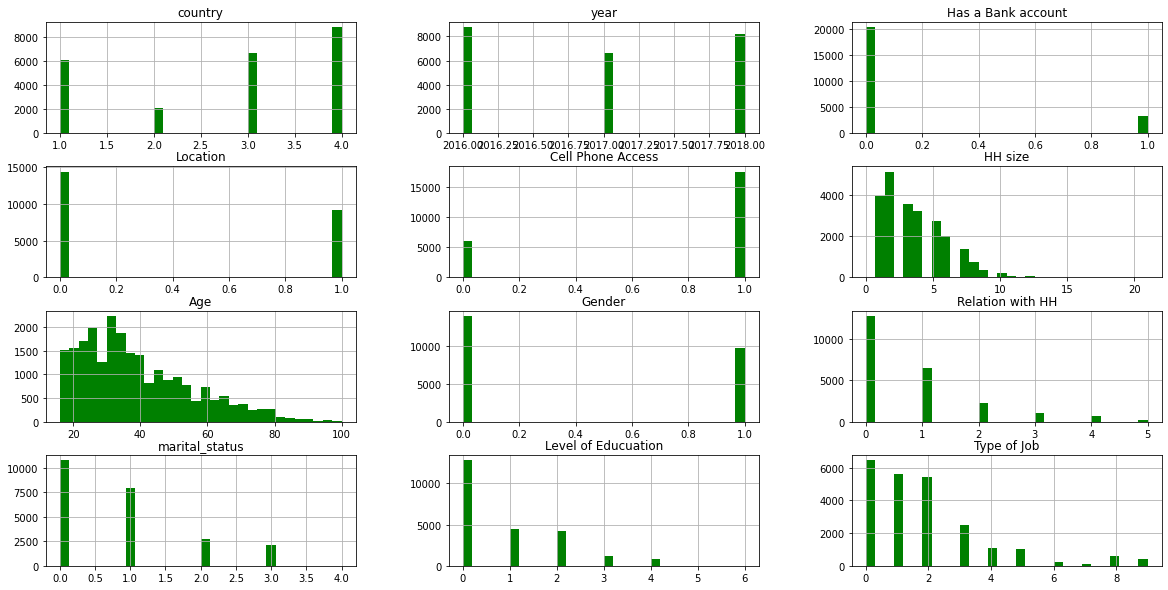

In [ ]:
#Checking for outliers
df.hist(bins = 30, figsize = (20,10), color = 'g')

Almost all our responses have outliers 

In [ ]:
# Let's see how many people have bank accounts 
have_df        = df[df['Has a Bank account'] == 1]
doesnt_df      = df[df['Has a Bank account'] == 0]

In [ ]:
have_df.shape

(3308, 13)

In [ ]:
doesnt_df.shape

(20213, 13)

In [ ]:
# Count the number of people who have bank accounts and those who don't
print("Total =", len(df))

print("Number of respondent who have bank account =", len(have_df))
print("Percentage of respondent who have bank account =", 1.*len(have_df)/len(df)*100.0, "%")
 
print("Number of  respondent who don't haave bank account =", len(doesnt_df))
print("Percentage of  respondent who don't have bank account =", 1.*len(doesnt_df)/len(df)*100.0, "%")

Total = 23521
Number of respondent who have bank account = 3308
Percentage of respondent who have bank account = 14.064027889970665 %
Number of  respondent who don't haave bank account = 20213
Percentage of  respondent who don't have bank account = 85.93597211002934 %


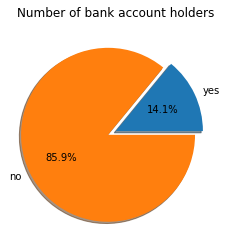

In [ ]:
#We can put the above into a visual
yes =(df['Has a Bank account'] == 1).sum()
no = (df['Has a Bank account'] == 0).sum()
labels = 'yes','no'
sizes = [yes,no]
explode = (0, 0.1)
plt.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', shadow = True)

plt.title("Number of bank account holders")
plt.show()

The percentage of respondent without bank account was 85.9% while that of those who had was 14.1%.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


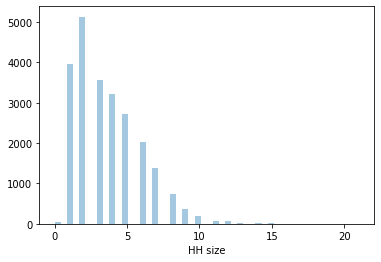

In [ ]:
#A house hold distplot
sns.distplot(df['HH size'],  kde=False,label='House Hold (HH) size')

The household size for most households is between 1 and 5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


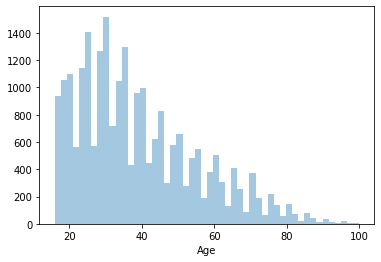

In [ ]:
#Age distplot
sns.distplot(df['Age'],  kde=False,label='Age')

Most of the sample population age bracket is 20 to 60 years

In [ ]:
#Their variance
df[['HH size','Age']].var()

HH size      5.192871
Age        272.519076
dtype: float64

We see that Age has a big variance the age of respondent is widely spread.

House holdsize has a small variance an indication of the sizes across the respondent to be close together

In [ ]:
# Let's do a skewness check
df[['HH size','Age']].skew()

HH size    0.979190
Age        0.842363
dtype: float64

Our numerical data has a positive skewness

In [ ]:
#kurtosis check
df[['HH size','Age']].kurt()


HH size    1.163598
Age        0.105420
dtype: float64

They have a Leptokurtic apperance which is an indication of presence of outliers

### **Bivariate Analysis**

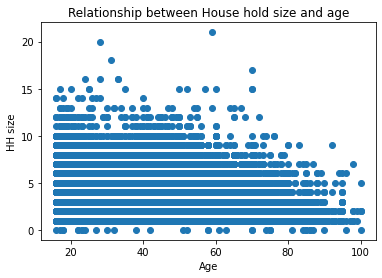

In [ ]:
#Let check for relationship between age and house hold size
plt.scatter(df['Age'], df['HH size'])
plt.title('Relationship between House hold size and age')
plt.xlabel('Age')
plt.ylabel('HH size')
plt.show()

Most household sizes decrease with increase age bracket

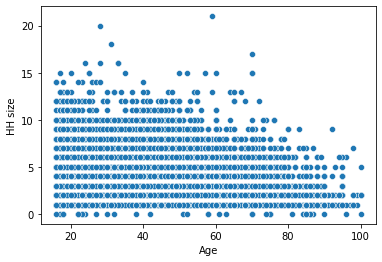

In [ ]:
#We use seaborn to see if there is a difference inthe above
sns.scatterplot( x="Age", y="HH size", data=df)

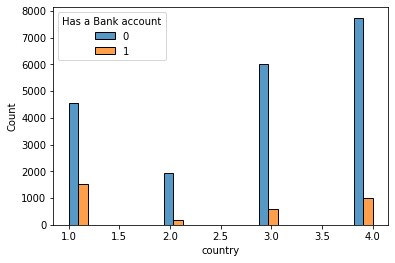

In [ ]:
#we compare those with bank account in country
sns.histplot( x="country", hue="Has a Bank account", data=df, stat="count", multiple="dodge", shrink=1)

There were more poeple in kenya with bank accounts compared to other east african countries. This is significant since Kenya's milestone towards mobile banking has been tremedous with the biggest champion being Safaricom inthe tech sector.

Text(0.5, 1.0, 'Location')

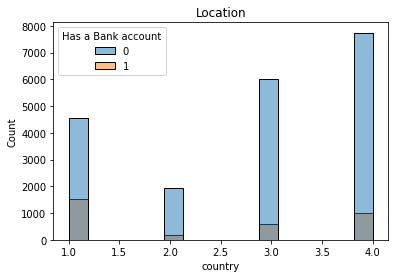

In [ ]:
#We compare countries using a stacked columns and the results as shown below are similar
sns.histplot(data = df, hue='Has a Bank account', x='country')
plt.title('Location')

The graph shows most people in Kenya have bank account 

Text(0.5, 1.0, 'Number of respondents')

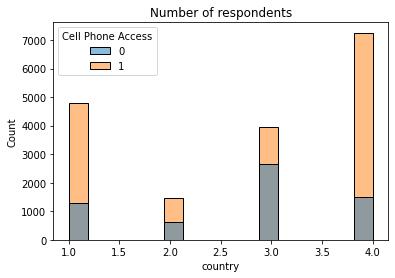

In [ ]:
sns.histplot(data = df, hue='Cell Phone Access', x='country')
plt.title('Number of respondents')

There are less people with cellphone access in Tanzania followed by Uganda.

Kenya and Rwanda respondents with cell phone access lie onthe upper side. This is possible since in east africa these two countries are the most evolving in their technology sector

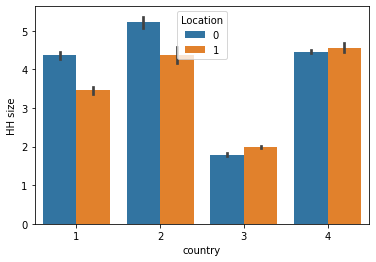

In [ ]:
sns.barplot(x="country", y="HH size", hue="Location", data=df)

The number of respondent living in rural vs urban area is almost similar across the countries. However there is spike for rural area in Kenya and Uganda

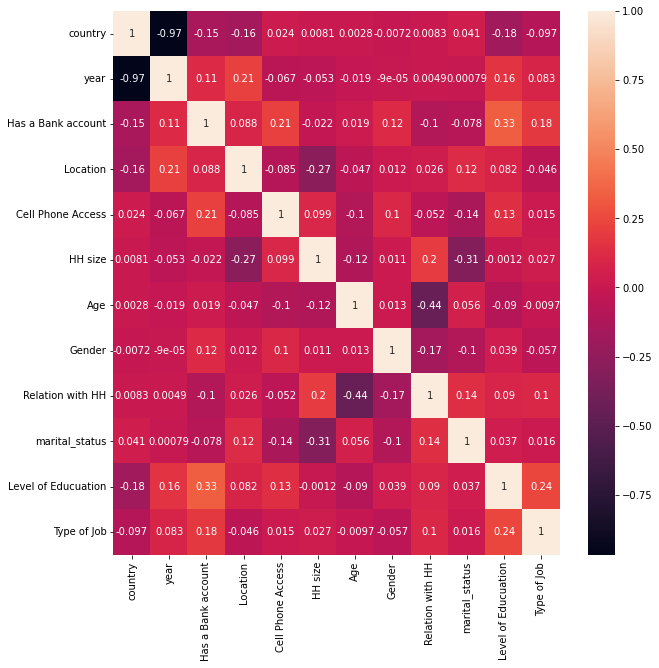

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)

There  is a correlation between the cell phone access and has a bank account which is expected with the mobile banking era.

The year also have some correlation with whether one has or doesn't have a bank account and also the location.

Level of education has correlation with type of job and if one has a bank account or not

## **Multivariate Analysis**

**Data Reduction**

Since data mining is a technique that is used to handle huge amounts of data. While working with a huge volume of data, analysis became harder in such cases. To get rid of this, we use the data reduction technique. It aims to increase storage efficiency and reduce data storage and analysis costs

There are various ways to go about it and will cover them below to see if our dataset fits that method to help in our prediction objective

**1. Principal Component Analysis**

In [ ]:
# First we refresh our mind on our dataset
df.head(3)


,country,year,uniqueid,Has a Bank account,Location,Cell Phone Access,HH size,Age,Gender,Relation with HH,marital_status,Level of Educuation,Type of Job
0,1,2018,uniqueid_1,1,0,1,3.0,24.0,0,1,0,2,0
1,1,2018,uniqueid_2,0,0,0,5.0,70.0,0,0,2,1,6
2,1,2018,uniqueid_3,1,1,1,5.0,26.0,1,4,1,4,0


In [ ]:
# Let's drop these columns as we move on as we don't need them for prediction
df.drop(['uniqueid'], axis=1, inplace=True)
df.head(4)

,country,year,Has a Bank account,Location,Cell Phone Access,HH size,Age,Gender,Relation with HH,marital_status,Level of Educuation,Type of Job
0,1,2018,1,0,1,3.0,24.0,0,1,0,2,0
1,1,2018,0,0,0,5.0,70.0,0,0,2,1,6
2,1,2018,1,1,1,5.0,26.0,1,4,1,4,0
3,1,2018,0,0,1,5.0,34.0,0,0,0,0,5


In [ ]:
#First we perform Preprocessing
X = df.drop('Has a Bank account', 1)
y = df['Has a Bank account']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# Second we Split the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [ ]:
# We then do Normalization
 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#We Apply PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.19450548, 0.15114293, 0.13504711, 0.1062171 , 0.10019039,
       0.07840868, 0.07241779, 0.06368588, 0.05602556, 0.03958641,
       0.00277267])

In [ ]:
# Training and Making Predictions using Logistic regression
# In this case we'll use random forest classification for making the predictions.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 87.82519979595307 %


It's important to note that the output algorithm is able to correctly predict individuals likely to have a bank account using the training set with a 88% accuracy.



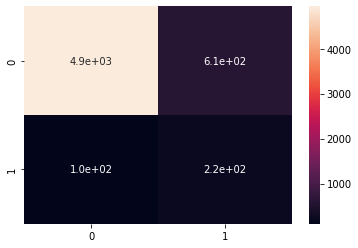

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5047
           1       0.68      0.27      0.38       834

    accuracy                           0.88      5881
   macro avg       0.78      0.62      0.66      5881
weighted avg       0.86      0.88      0.85      5881



From 5881 of the testing dataset we are able to predict number of individuals most likely to have a bank account with  a 88% accuracy.


We get an 88% accuracy for test set which is similar to the train set (87.8%)  making it consistent

**2. Factor Analysis**


 We go to the next data reduction technique to see if its applicable and if gives better precision and predicting. 


In [ ]:
#we remind ourselves how our data looks like
df.head()

,country,year,Has a Bank account,Location,Cell Phone Access,HH size,Age,Gender,Relation with HH,marital_status,Level of Educuation,Type of Job
0,1,2018,1,0,1,3.0,24.0,0,1,0,2,0
1,1,2018,0,0,0,5.0,70.0,0,0,2,1,6
2,1,2018,1,1,1,5.0,26.0,1,4,1,4,0
3,1,2018,0,0,1,5.0,34.0,0,0,0,0,5
4,1,2018,0,1,0,8.0,26.0,1,2,1,0,1


In [ ]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(90142.17874178833, 0.0)

In the above Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [ ]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)
print(kmo_model)

0.5260411522506827


Our KMO is 0.5 rendering it Miserable inthe KMO classification


This means this form of data reduction is not ideal for our data set for predicting which respondents are likely to have a bank account

**3.  Linear Discriminant Analysis**




In [ ]:
#wefirst remind ourselves how our data looks like
df.head()

,country,year,Has a Bank account,Location,Cell Phone Access,HH size,Age,Gender,Relation with HH,marital_status,Level of Educuation,Type of Job
0,1,2018,1,0,1,3.0,24.0,0,1,0,2,0
1,1,2018,0,0,0,5.0,70.0,0,0,2,1,6
2,1,2018,1,1,1,5.0,26.0,1,4,1,4,0
3,1,2018,0,0,1,5.0,34.0,0,0,0,0,5
4,1,2018,0,1,0,8.0,26.0,1,2,1,0,1


In [ ]:
# First step is to divide dataset into features and corresponding labels and then divide the resultant dataset into training and test sets. 
X = df.drop('Has a Bank account', 1)
y = df['Has a Bank account']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
#we then divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# we perform Feature scaling
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 100%, 
# which is greater than the accuracy achieved with one principal component, which was 93.33%.

[[3955   90]
 [ 471  189]]
Accuracy0.8807651434643996


We can see that with one linear discriminant, the algorithm achieved an accuracy of 88%, which is similar to the accuracy achieved with principal component, which was 88%.

## **Conclusion**

*   Both LDA and PCA gave us a similar accuracy of 88% while making a prediction of which individual is more likely to have or use a bank account.

*   Both methods are used in data reduction. They both convert high dimensinal data into low dimensial data

*   PCA is used best for numerical data. It's an unsupervised learning algorithm as it ignores the class labels that maximize the variance in a dataset, to find the directions. In other words, PCA is basically summarization of data.

*   LDA is a supervised algorithm as it takes the class label into consideration. It is a way to reduce ‘dimensionality’ while at the same time preserving as much of the class discrimination information as possible.





### **Recommendation**

Considering our dataset had alot of categorical data the best method to predict which individuals are more likely to have or use a bank account for this project is **Linear Discriminant Analysis (LDA)**.